# LEGO Dataset analysis

<img src="./assets/harrypotter.jpg">

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. 

<img src="./assets/bricks.jpg">

<img src="./assets/starwars_2.jpg">

# Import Statements

In [3]:
import numpy as np
import pandas as pd

# Data Exploration

**step1**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [4]:
lego=pd.read_csv("./data/colors.csv")
lego.name.nunique()
#lego.name.value_counts()

135

**step2**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [104]:
lego.is_trans.value_counts()
lego.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


<h3>Understanding LEGO Themes vs. LEGO Sets</h3>
  

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**step3**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [6]:
df_sets = pd.read_csv("./data/sets.csv")

In [7]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [153]:
df_sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**step4**: In which year were the first LEGO sets released and what were these sets called?

In [154]:
df_sets.loc[df_sets.year.nsmallest().index,'name']

9521           Extra-Large Gift Set (ABB)
9534                 Large Gift Set (ABB)
9539                Medium Gift Set (ABB)
9544                Small Brick Set (ABB)
9545    Small Doors and Windows Set (ABB)
Name: name, dtype: object

**step5**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [155]:
df_sets.loc[df_sets.year.nsmallest().index,'set_num'].nunique()

5

<img src="./assets/starwars4.jpg">

**step6**: Find the top 5 LEGO sets with the most number of parts. 

In [156]:
df_sets.loc[df_sets.num_parts.nlargest(5).index,['name','num_parts']]

,name,num_parts
15004,The Ultimate Battle for Chima,9987
11183,UCS Millennium Falcon,7541
10551,Hogwarts Castle,6020
295,Taj Mahal,5923
221,Taj Mahal,5922


**step7**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [157]:
###number of parts sorted according to each year:
df_sets.groupby(by='year').num_parts.nlargest(3)

year       
1949  9534      178
      9521      142
      9539      142
1950  9523        1
      9526        1
               ... 
2020  313      3898
      5531     3696
2021  11334       0
      11335       0
      11337       0
Name: num_parts, Length: 213, dtype: int64

In [162]:
###unique sets for each year:
df_sets.groupby(by='year').name.count()

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: name, Length: 71, dtype: int64

**Difference in number of lego sets for 2019 and 1995**

In [163]:
df_sets.groupby(by='year').name.count().loc[2019] - df_sets.groupby(by='year').name.count().loc[1995]

665

<img src="./assets/batman.jpg">

**step8**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [167]:
##everything except last two years:
x = df_sets.groupby(by='year').count().set_num[:-2]
x

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2015    774
2016    757
2017    786
2018    816
2019    840
Name: set_num, Length: 69, dtype: int64

Text(0, 0.5, 'sets')

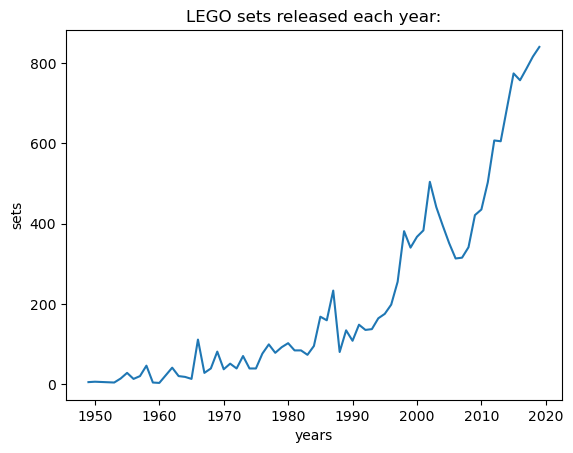

In [168]:
from matplotlib import pyplot as plt
plt.plot(x)
plt.title('LEGO sets released each year:')
plt.xlabel("years")
plt.ylabel("sets")

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [169]:
list(df_sets.groupby('year').theme_id)

[(1949,
  9521    365
  9534    365
  9539    365
  9544    371
  9545    371
  Name: theme_id, dtype: int64),
 (1950,
  9523    371
  9526    371
  9546    371
  9547    371
  9548    371
  9549    371
  Name: theme_id, dtype: int64),
 (1953,
  9525    366
  9530    371
  9541    371
  9557    371
  Name: theme_id, dtype: int64),
 (1954,
  9532    371
  9533    371
  9537    371
  9538    371
  9550    371
  9551    371
  9552    371
  9553    371
  9554    371
  9555    371
  9556    371
  9559    372
  9560    372
  9562    371
  Name: theme_id, dtype: int64),
 (1955,
  872      372
  889      372
  892      372
  894      372
  896      372
  898      371
  903      371
  905      371
  907      371
  911      371
  915      371
  923      371
  927      371
  929      371
  931      371
  934      371
  935      371
  936      371
  938      371
  948      371
  959      371
  961      372
  967      371
  970      371
  980      371
  982      371
  1043     370
  14995    497
  

In [171]:
x = df_sets.groupby('year').theme_id.count()[:-2]

**step9**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

Text(0.5, 1.0, 'Number of unique themes per year')

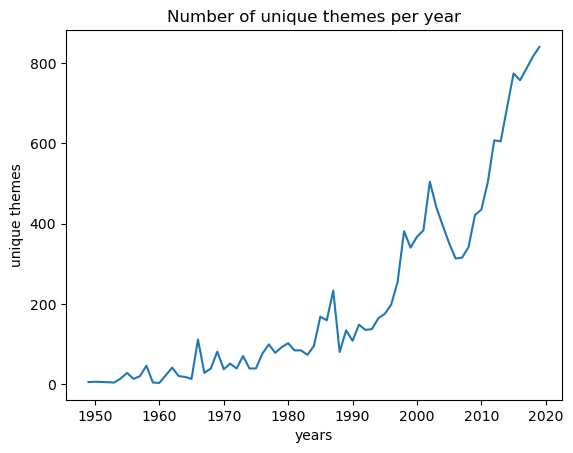

In [174]:
plt.plot(x)
plt.xlabel("years")
plt.ylabel("unique themes")
plt.title("Number of unique themes per year")

**The number of themes added have increased every year untill late 1990's**

**from then on it has stagnated for around 10 years**


### Line Charts with Two Seperate Axes

In [175]:
df_sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


**step10**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [182]:
x = df_sets.groupby('year').num_parts.mean()


### Scatter Plots in Matplotlib

**step11**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

Text(0, 0.5, 'average size')

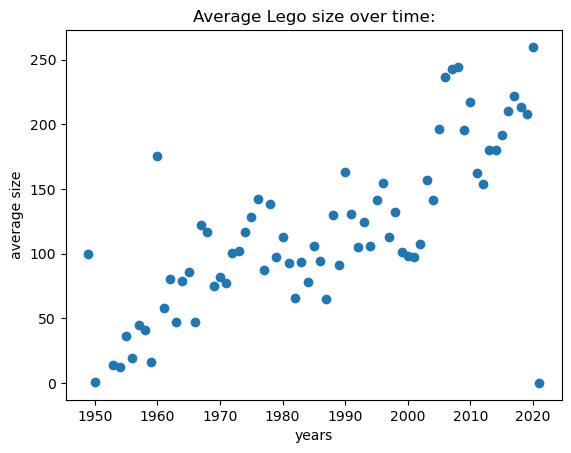

In [183]:
plt.scatter(x.index,x)
plt.title("Average Lego size over time:")
plt.xlabel("years")
plt.ylabel("average size")

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [185]:
df_sets.groupby('theme_id').set_num.count().nlargest()

theme_id
158    753
501    656
494    398
435    356
503    329
Name: set_num, dtype: int64

In [186]:
df_sets[df_sets.num_parts == 753]

,set_num,name,year,theme_id,num_parts
7941,60004-1,Fire Station,2013,58,753


<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**step12**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [25]:
themes = pd.read_csv("./data/themes.csv")
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [26]:
df_sets[df_sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


**Starwars LEGO:  R2-D2 / C-3PO Droid Collectors Set**
<img src="./assets/starwars.jpg">

In [27]:
df_sets[df_sets.theme_id == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


**Starwars LEGO: X-wing**
<img src="./assets/starwars_1.jpg">

### Merging (i.e., Combining) DataFrames based on a Key


In [84]:
df_sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [85]:
s=pd.merge(df_sets,themes, left_on='theme_id',right_on='id', how='inner')

In [86]:
s

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,1,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,1,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,1,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,1,Technic,NaN
...,...,...,...,...,...,...,...,...
15705,K6762-1,Western Kit,2002,475,0,475,Western,NaN
15706,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,430,Pirates,425.0
15707,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,430,Pirates,425.0
15708,LLCA30-1,Pirate Ship Diorama (LLCA Ambassador Pass Excl...,2006,430,127,430,Pirates,425.0


In [101]:
t=pd.DataFrame(s.groupby(by=['name_y']).theme_id.count().index, s.groupby(by=['name_y']).theme_id.count().values)

In [102]:
index=['Star Wars', 'Gear', 'Friends', 'Ninjago', 'Key Chain',
       'Basic Set', 'Books', 'Town', 'Supplemental', 'Duplo and Explore']

Text(0.5, 1.0, 'LEGO counts')

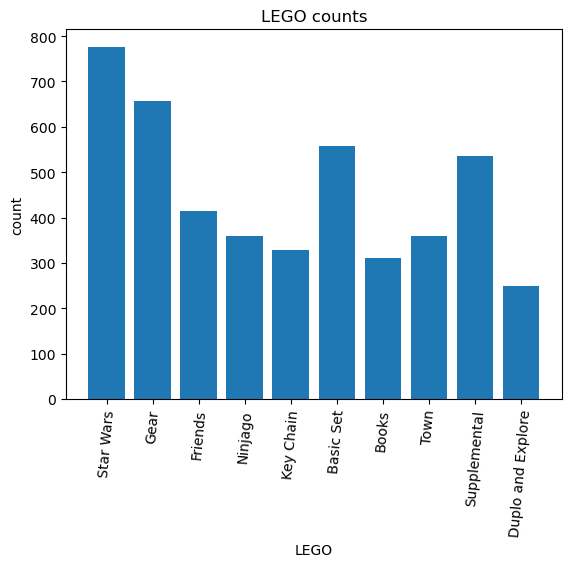

In [103]:
plt.bar(index, s.groupby(by=['name_y']).theme_id.count()[index])
plt.xticks(rotation=85)
plt.xlabel('LEGO')
plt.ylabel('count')
plt.title('LEGO counts')

**It seems LEGO is pretty good at making themes on Star Wars, Ninjago etc**
**but it is also making products on key chains, supplementals ??**
**Has LEGO strayed from its core business or is it successfully diversifying?**
**That we can't answer from our dataset. It's one up to a business school case study to decide. 🤷‍♀️**